In [23]:
import numpy as np
import pickle
from scipy.stats import spearmanr, kendalltau

with open("pickle_data2/y_pred_test.pkl", 'rb') as f:
    Y_pred = pickle.load(f)
with open("pickle_data2/y_test_test.pkl", 'rb') as f:
    Y_test = pickle.load(f)
with open("pickle_data2/bw.pkl", 'rb') as f:
    balance_weights = pickle.load(f)
with open('pickle_data2/sub_scenarios_pospos.pkl', 'rb') as f:
    sub_scenarios_pospos = pickle.load(f)
with open("pickle_data2/scen.pkl", 'rb') as f:
    scenarios = pickle.load(f)
with open("pickle_data2/sub_scen.pkl", 'rb') as f:
    subscenarios_position = pickle.load(f)

scenario = 'longbench'
to_handle_scenario = 'longbench'
scenarios_position = {}
scenarios_position['longbench'] = range(4750)
pred_scores = (balance_weights*Y_pred)[:,scenarios_position[scenario]].mean(axis=1) # Pred performance
true = (balance_weights*Y_test)[:,scenarios_position[scenario]].mean(axis=1) # True performance

scenario_dict = {"Single-Document QA":["LongBench_narrativeqa", "LongBench_qasper", "LongBench_multifieldqa_en", "LongBench_multifieldqa_zh"],
                "Multi-Document QA":["LongBench_hotpotqa", "LongBench_2wikimqa", "LongBench_musique", "LongBench_dureader"],
                "Summarization":["LongBench_gov_report", "LongBench_qmsum", "LongBench_vcsum", "LongBench_samsum"],
                "Few-shot Learning":["LongBench_trec", "LongBench_lsht", "LongBench_triviaqa", "LongBench_multi_news"],
                "Code Completion":["LongBench_lcc", "LongBench_repobench-p"],
                "Synthetic Task":["LongBench_passage_count", "LongBench_passage_retrieval_en", "LongBench_passage_retrieval_zh"]}

sub_sp = [[] for i in range(6)]
sub_score = [[] for i in range(6)]
sub_pred_score = [[] for i in range(6)]

# 计算斯皮尔曼排序相关系数\n",
sp, spearman_p_value = spearmanr(pred_scores, true)


sub_scenarios_scores = [[] for i in range(6)]
sub_scenarios_pred_scores = [[] for i in range(6)]
sub_scenarios_lens = [[] for i in range(6)]
sub_scenarios = list(scenario_dict.keys())
sub_sub_scenarios = list(scenario_dict.values())

for sub in scenarios[to_handle_scenario]:
#         print(sub)
    for i in range(6):
        if sub in sub_sub_scenarios[i]:
#                 print(sub_scenarios[i])
            idx = subscenarios_position[to_handle_scenario][sub]
            if len(sub_scenarios_scores[i]) == 0:
                sub_scenarios_scores[i] = Y_test[:, idx] * balance_weights[idx]
                sub_scenarios_pred_scores[i] = Y_pred[:, idx] * balance_weights[idx]
            else:
                sub_scenarios_scores[i] = np.concatenate((sub_scenarios_scores[i], Y_test[:, idx] * balance_weights[idx]), axis=1)
                sub_scenarios_pred_scores[i] = np.concatenate((sub_scenarios_pred_scores[i], Y_pred[:, idx] * balance_weights[idx]), axis=1)
            sub_scenarios_lens[i].append(len(idx))
            break
#     print()
#     print(sub_scenarios)
#     print(sub_scenarios_lens)
#     print(sub_scenarios_scores[0].shape)
#     print(sub_scenarios_pred_scores[0].shape)


for i in range(6):
    spearman_corr, spearman_p_value = spearmanr(sub_scenarios_scores[i].mean(axis=1), sub_scenarios_pred_scores[i].mean(axis=1))
    sub_sp[i].append(spearman_corr)
    sub_score[i].append(sub_scenarios_scores[i].mean(axis=1))
    sub_pred_score[i].append(sub_scenarios_pred_scores[i].mean(axis=1))

0.9774436090225563


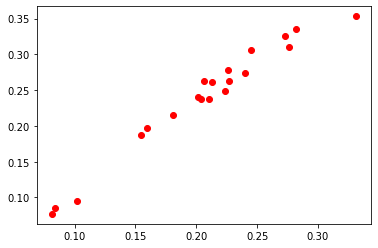

In [25]:
import matplotlib.pyplot as plt

print(sp)

# 绘制散点图
plt.scatter(pred_scores, true, color='red', label='Data Points')  

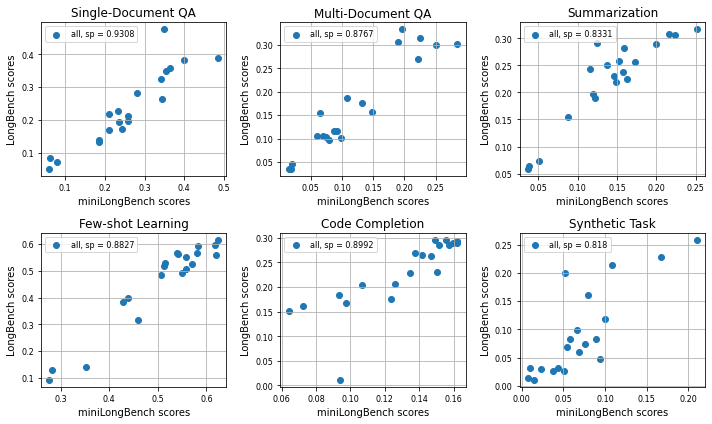

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
# x = np.concatenate((range(1, 25, 1), range(25, 50, 2), range(50, 100, 8), range(100, 500, 10)))
# y = np.array(sub_sp[:])

# 创建一个2x3的子图布局
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# 在每个子图中绘制散点图
for i in range(2):
    for j in range(3):
        axs[i, j].scatter(sub_pred_score[i*3+j], sub_score[i*3+j], label=f'all, sp = {round(sub_sp[i*3+j][0], 4)}')
#         axs[i, j].plot(x, whole_sub_sp[i*3+j], label='all')  # 绘制第一组y
#         axs[i, j].plot(x, test_sub_sp[i*3+j], label='test')  # 绘制第二组y
#         axs[i, j].plot(x, train_sub_sp[i*3+j], label='train')  # 绘制第三组y
        axs[i, j].set_xlabel('miniLongBench scores')
        axs[i, j].set_ylabel('LongBench scores')
        axs[i, j].set_title(sub_scenarios[i*3+j]) #+  f"\nall sp = {round(whole_sub_sp[i][0], 4)}\ntest sp = {round(test_sub_sp[i][0], 4)}\ntrain sp = {round(train_sub_sp[i][0], 4)}", fontsize=10)
#         axs[i, j].xaxis.set_major_locator(MaxNLocator(nbins=8))  # 刻度间隔为50
#         axs[i, j].set_aspect('equal', adjustable='box')
        axs[i, j].grid()
        # 添加图例
        axs[i, j].legend(loc='upper left', prop={'size': 8})
        axs[i, j].tick_params(labelsize=8)

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()